# Investment Value

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [2]:
# Set current amount of shares data
shares = {
    'shares': [200, 320]
}

# Set the tickers
tickers = ['MSFT', 'AAPL']

# Create the shares DataFrame
shares_df = pd.DataFrame(shares, index=tickers)

# Display shares data
shares_df

,shares
MSFT,200
AAPL,320


## Load and Verify Environment Variables

In [3]:
# Load .env environment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(type(alpaca_api_key))
print(type(alpaca_secret_key))


<class 'str'>
<class 'str'>


## Create the Alpaca API Object

In [6]:
help(tradeapi.REST)

Help on class REST in module alpaca_trade_api.rest:

class REST(builtins.object)
 |  REST(key_id: str = None, secret_key: str = None, base_url: alpaca_trade_api.common.URL = None, api_version: str = None, oauth=None, raw_data: bool = False)
 |  
 |  Methods defined here:
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_val, exc_tb)
 |  
 |  __init__(self, key_id: str = None, secret_key: str = None, base_url: alpaca_trade_api.common.URL = None, api_version: str = None, oauth=None, raw_data: bool = False)
 |      :param raw_data: should we return api response raw or wrap it with
 |                       Entity objects.
 |  
 |  add_to_watchlist(self, watchlist_id: str, symbol: str) -> alpaca_trade_api.entity.Watchlist
 |      Add an asset to the watchlist
 |  
 |  cancel_all_orders(self) -> None
 |      Cancel all open orders
 |  
 |  cancel_order(self, order_id: str) -> None
 |      Cancel an order
 |  
 |  close(self)
 |  
 |  close_all_positions(self) -> List[alpaca_trad

In [7]:
# Create the Alpaca API object
# instantiate the connection with the REST api
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

## Set a variable `today` with current date using ISO format

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2024-01-26', tz='America/New_York').isoformat()

## Set a variable `timeframe` with value equal to `1Day`

In [9]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = '1D'

## Create a DataFrame with current price data for `MSFT` & `APPL` using `alpaca.get_bars()`

In [10]:
help(alpaca.get_bars)

Help on method get_bars in module alpaca_trade_api.rest:

get_bars(symbol: Union[str, List[str]], timeframe: alpaca_trade_api.rest.TimeFrame, start: Optional[str] = None, end: Optional[str] = None, adjustment: str = 'raw', limit: int = None, feed: Optional[str] = None, asof: Optional[str] = None, sort: Optional[alpaca_trade_api.rest.Sort] = None) -> alpaca_trade_api.entity_v2.BarsV2 method of alpaca_trade_api.rest.REST instance



In [11]:
# Get current price data for MSFT and AAPL
# Fetch market data using the get_bars() method
portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start= today,
    end=today
).df

# portfolio_df

# Reorganize the DataFrame
# Separate ticker data
# creates a new df MSFT containing only the row where the 'symbol' is 'MSFT', and removes the 'symbol' column 
MSFT = portfolio_df[portfolio_df['symbol']=='MSFT'].drop('symbol', axis=1)
AAPL = portfolio_df[portfolio_df['symbol']=='AAPL'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# creates a new df containing all columns from both MSFT and AAPL, label the columns - multiindex 
portfolio_df = pd.concat([MSFT, AAPL], axis=1, keys=['MSFT', 'AAPL'])

# Display sample data
portfolio_df

MSFT                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2024-01-26 05:00:00+00:00  403.93  406.17  402.43      336780  404.37   

                                                   AAPL                  \
                             volume        vwap   close    high     low   
timestamp                                                                 
2024-01-26 05:00:00+00:00  17795635  404.024506  192.42  194.76  191.94   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2024-01-26 05:00:00+00:00      533460  194.27  44568656  193.121135

## Calculate the current value in dollars of the stock portfolio

In [12]:
# Fetch the current closing prices from the DataFrame
# msft_close = portfolio_df['MSFT']['close']
msft_close = float(portfolio_df['MSFT']['close'])
aapl_close = float(portfolio_df['AAPL']['close'])

/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_35169/2157368052.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  msft_close = float(portfolio_df['MSFT']['close'])
/var/folders/wl/x3hxw0v13sb9sgxcqzzdxwlh0000gn/T/ipykernel_35169/2157368052.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  aapl_close = float(portfolio_df['AAPL']['close'])


In [13]:
# Compute the current value in dollars of the stock portfolio
msft_value = shares_df.iloc[0][0] * msft_close
aapl_value = shares_df.iloc[1][0] * aapl_close

# Print the current value of the stocks portfolio
print(f'The value of the portfolio is: ${msft_value+aapl_value:.2f}')

The value of the portfolio is: $142360.40


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [14]:
# Set the data for the shares value DataFrame
shares_value = {
    'MSFT': [msft_value],
    'AAPL': [aapl_value]
}

# Create a DataFrame with the current value of shares
shares_value_df = pd.DataFrame(shares_value)

# Display DataFrame data
shares_value_df

,MSFT,AAPL
0,80786.0,61574.4


array([<Axes: ylabel='shares'>], dtype=object)

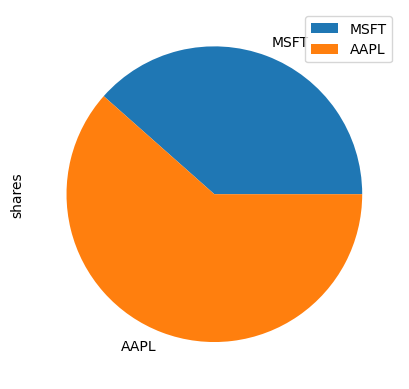

In [15]:
# Create a pie chart to show the proportion of stocks in the portfolio
shares_df.plot(kind='pie', subplots=True)

<Axes: >

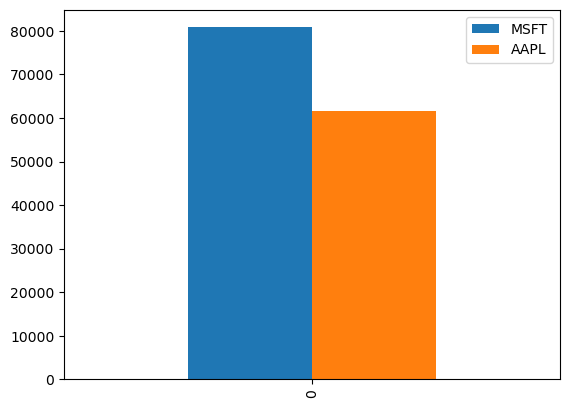

In [16]:
# Create a bar plot to show the value of shares
shares_value_df.plot(kind='bar')